In [1]:
from google.colab import files
files.upload()  # This will prompt you to upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pranathisreeja","key":"f74e844b8927ecd92b648f7262034cdd"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions to secure the file

# 4. Download the dataset
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

# 5. Unzip the dataset
!unzip chest-xray-pneumonia.zip -d chest_xray  # Extract into a directory

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/chest_xray/train

In [3]:
# List the contents to verify
!ls chest_xray

# Remove the zip file to save space (optional)
!rm chest-xray-pneumonia.zip

chest_xray


In [4]:
import os

train_dataset_path = 'chest_xray/chest_xray/train'

# Display directory structure and file counts
for root, dirs, files in os.walk(train_dataset_path):
    print(f"Directory: {root}")
    print(f"  Subdirectories: {dirs}")
    print(f"  Number of files: {len(files)}")

test_dataset_path = 'chest_xray/chest_xray/test'

# Display directory structure and file counts
for root, dirs, files in os.walk(test_dataset_path):
    print(f"Directory: {root}")
    print(f"  Subdirectories: {dirs}")
    print(f"  Number of files: {len(files)}")

val_dataset_path = 'chest_xray/chest_xray/val'

# Display directory structure and file counts
for root, dirs, files in os.walk(val_dataset_path):
    print(f"Directory: {root}")
    print(f"  Subdirectories: {dirs}")
    print(f"  Number of files: {len(files)}")

Directory: chest_xray/chest_xray/train
  Subdirectories: ['NORMAL', 'PNEUMONIA']
  Number of files: 0
Directory: chest_xray/chest_xray/train/NORMAL
  Subdirectories: []
  Number of files: 1341
Directory: chest_xray/chest_xray/train/PNEUMONIA
  Subdirectories: []
  Number of files: 3875
Directory: chest_xray/chest_xray/test
  Subdirectories: ['NORMAL', 'PNEUMONIA']
  Number of files: 0
Directory: chest_xray/chest_xray/test/NORMAL
  Subdirectories: []
  Number of files: 234
Directory: chest_xray/chest_xray/test/PNEUMONIA
  Subdirectories: []
  Number of files: 390
Directory: chest_xray/chest_xray/val
  Subdirectories: ['NORMAL', 'PNEUMONIA']
  Number of files: 0
Directory: chest_xray/chest_xray/val/NORMAL
  Subdirectories: []
  Number of files: 8
Directory: chest_xray/chest_xray/val/PNEUMONIA
  Subdirectories: []
  Number of files: 8


### Create Datasets

In [5]:
import os
import shutil

# Paths
base_path = 'chest_xray/chest_xray'
val_path = os.path.join(base_path, 'val')
test_path = os.path.join(base_path, 'test')
combined_path = os.path.join(base_path, 'val_test')

# Create combined folders
os.makedirs(combined_path, exist_ok=True)
for class_name in ['NORMAL', 'PNEUMONIA']:
    os.makedirs(os.path.join(combined_path, class_name), exist_ok=True)

# Helper function to copy images
def copy_images(source_dir, target_dir):
    for filename in os.listdir(source_dir):
        source = os.path.join(source_dir, filename)
        target = os.path.join(target_dir, filename)
        if os.path.isfile(source):
            shutil.copy2(source, target)

# Copy images from val and test into combined_path
for class_name in ['NORMAL', 'PNEUMONIA']:
    copy_images(os.path.join(val_path, class_name), os.path.join(combined_path, class_name))
    copy_images(os.path.join(test_path, class_name), os.path.join(combined_path, class_name))

print("✅ Successfully combined val and test datasets into 'val_test/'")

✅ Successfully combined val and test datasets into 'val_test/'


In [6]:
import tensorflow as tf

# Define image size and batch size
img_size = (128, 128)
batch_size = 32

# Train dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'chest_xray/chest_xray/train',
    image_size=img_size,
    batch_size=batch_size,
    color_mode='rgb'
)

# Validation and Test from a combined folder
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'chest_xray/chest_xray/val_test',
    image_size=img_size,
    batch_size=batch_size,
    color_mode='rgb',
    validation_split=0.5,
    subset='validation',
    seed=42
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'chest_xray/chest_xray/val_test',
    image_size=img_size,
    batch_size=batch_size,
    color_mode='rgb',
    validation_split=0.5,
    subset='training',
    seed=42
)

Found 5216 files belonging to 2 classes.
Found 640 files belonging to 2 classes.
Using 320 files for validation.
Found 640 files belonging to 2 classes.
Using 320 files for training.


In [7]:
# Take one batch from the dataset
for images, labels in train_dataset.take(1):
    print("Images batch shape:", images.shape)
    print("Labels batch shape:", labels.shape)

Images batch shape: (32, 128, 128, 3)
Labels batch shape: (32,)


In [8]:
# Take one batch
for images, labels in train_dataset.take(1):
    # Take the first image in the batch
    image = images[0]

    # TensorFlow tensors: use tf.reduce_max and tf.reduce_min
    max_pixel = tf.reduce_max(image).numpy()
    min_pixel = tf.reduce_min(image).numpy()

    print("Max pixel value:", max_pixel)
    print("Min pixel value:", min_pixel)

Max pixel value: 254.64844
Min pixel value: 0.0


### Sample Images from dataset

11
21


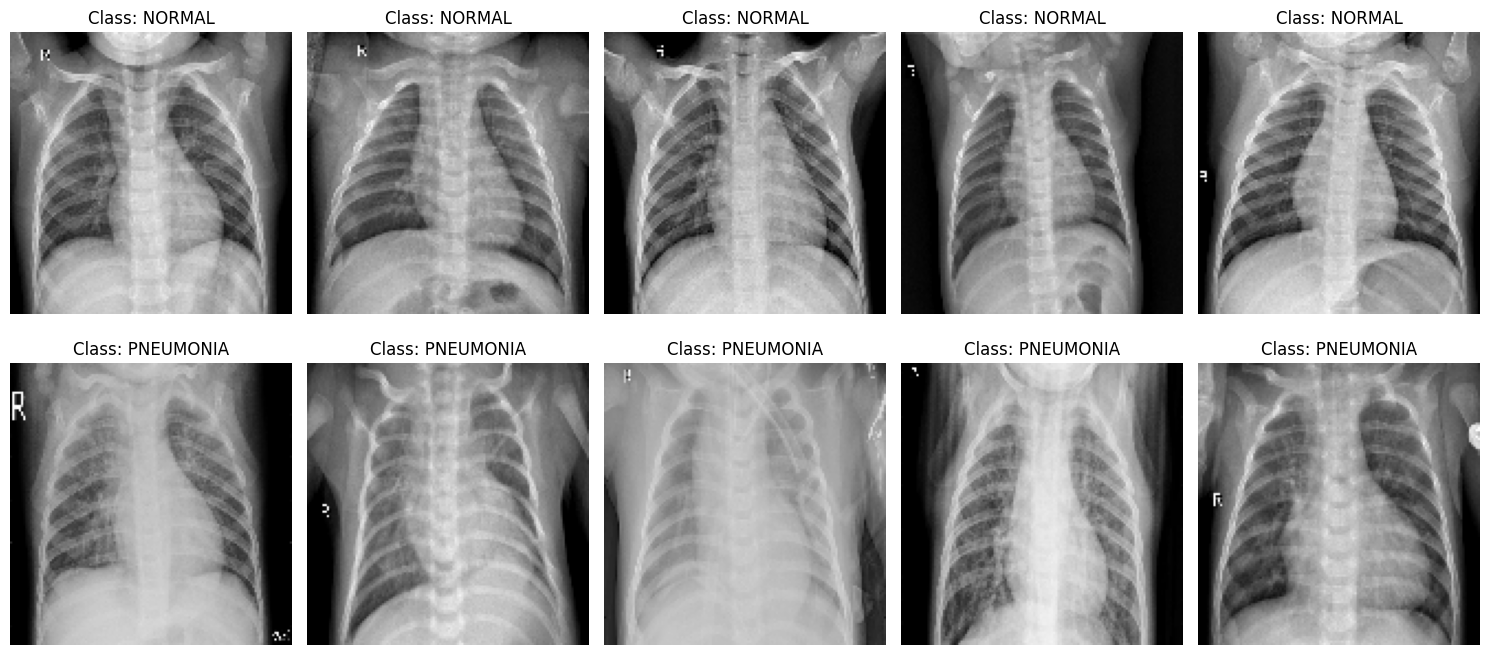

In [9]:
import matplotlib.pyplot as plt
import random

# Assuming train_dataset is a batched tf.data.Dataset with RGB images
class_names = train_dataset.class_names  # ['NORMAL', 'PNEUMONIA']

# Gather all images and labels from one batch
all_images = []
all_labels = []
for images, labels in train_dataset.take(1):
    all_images.extend(images.numpy())
    all_labels.extend(labels.numpy())

# Separate images by class
normal_images = [img for img, label in zip(all_images, all_labels) if label == 0]
pneumonia_images = [img for img, label in zip(all_images, all_labels) if label == 1]

print(len(normal_images))
print(len(pneumonia_images))

# Randomly select 5 from each class
normal_samples = random.sample(normal_images, min(5, len(normal_images)))
pneumonia_samples = random.sample(pneumonia_images, min(5, len(pneumonia_images)))

# Combine for plotting
selected_images = normal_samples + pneumonia_samples
selected_labels = [0]*len(normal_samples) + [1]*len(pneumonia_samples)

# Plot them
plt.figure(figsize=(15, 7))
for i, (img, label) in enumerate(zip(selected_images, selected_labels)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img.astype("uint8"))
    plt.title(f"Class: {class_names[label]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### Preprocessing of Images

In [10]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),           # Randomly flip images horizontally
    layers.RandomRotation(0.1),                # Randomly rotate images by ±10%
    layers.RandomZoom(0.1),                    # Random zoom in/out by 10%
    layers.RandomTranslation(0.1, 0.1),        # Randomly shift images horizontally and vertically
    layers.RandomContrast(0.1),                # Randomly change contrast
])

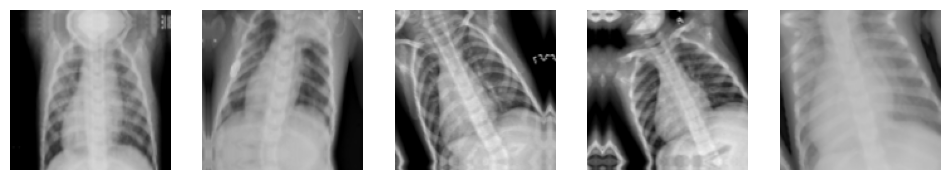

In [11]:
import matplotlib.pyplot as plt

# Take one batch from the training dataset
for images, _ in train_dataset.take(1):
    augmented_images = data_augmentation(images, training=True)

    plt.figure(figsize=(12, 6))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))  # Display as RGB
        plt.axis('off')

    plt.show()


In [12]:
# Only augment the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

### Model

In [13]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, Input

# Input
inputs = Input(shape=(128, 128, 3), name='input_layer')

# Normalization
x = layers.Rescaling(1./255)(inputs)

# Load base model
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# # Extract layers from the base model
# # To capture the output of 'block_16_project', you must use get_layer().output
block_16_output = base_model.get_layer('block_16_project').output

# # Now define a model from base_model.input to block_16_project's output
feature_extractor = models.Model(inputs=base_model.input, outputs=block_16_output)

# Pass through the feature extractor
features = feature_extractor(x)

# Continue with your classification head
gap = layers.GlobalAveragePooling2D()(features)
dropout = layers.Dropout(0.3)(gap)
outputs = layers.Dense(2, activation='softmax')(dropout)

# Final model (for training & inference)
model = models.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_1 (Functional)       │ (None, 4, 4, 320)      │     1,841,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 320)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           642 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,842,626 (7.03 MB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 1,841,984 (7.03 MB)

In [14]:
from sklearn.utils import class_weight
import numpy as np

# Assuming labels are 0 for NORMAL and 1 for PNEUMONIA
all_labels = []
for _, labels in train_dataset.unbatch():
    all_labels.append(labels.numpy())

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(all_labels),
    y=all_labels
)

class_weights_dict = {i : weight for i, weight in enumerate(class_weights)}
print(class_weights_dict)

{0: np.float64(1.9448173005219984), 1: np.float64(0.6730322580645162)}


### Training

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    class_weight=class_weights_dict,
    callbacks=[early_stopping]
)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 62s 315ms/step - accuracy: 0.5753 - loss: 0.8641 - val_accuracy: 0.8313 - val_loss: 0.4175
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 49s 300ms/step - accuracy: 0.8074 - loss: 0.4345 - val_accuracy: 0.8656 - val_loss: 0.3685
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 49s 300ms/step - accuracy: 0.8394 - loss: 0.3543 - val_accuracy: 0.8750 - val_loss: 0.3495
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 307ms/step - accuracy: 0.8617 - loss: 0.3069 - val_accuracy: 0.8750 - val_loss: 0.3415
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 300ms/step - accuracy: 0.8658 - loss: 0.3179 - val_accuracy: 0.8687 - val_loss: 0.3362
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 49s 298ms/step - accuracy: 0.8764 - loss: 0.3004 - val_accuracy: 0.8719 - val_loss: 0.3367
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 84s 313ms/step - accuracy: 0.8764 - loss: 0.2816 - val_accuracy: 0.8781 - val_loss: 0.3254
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 50s 305ms/step - accuracy: 0.8708 - loss: 0

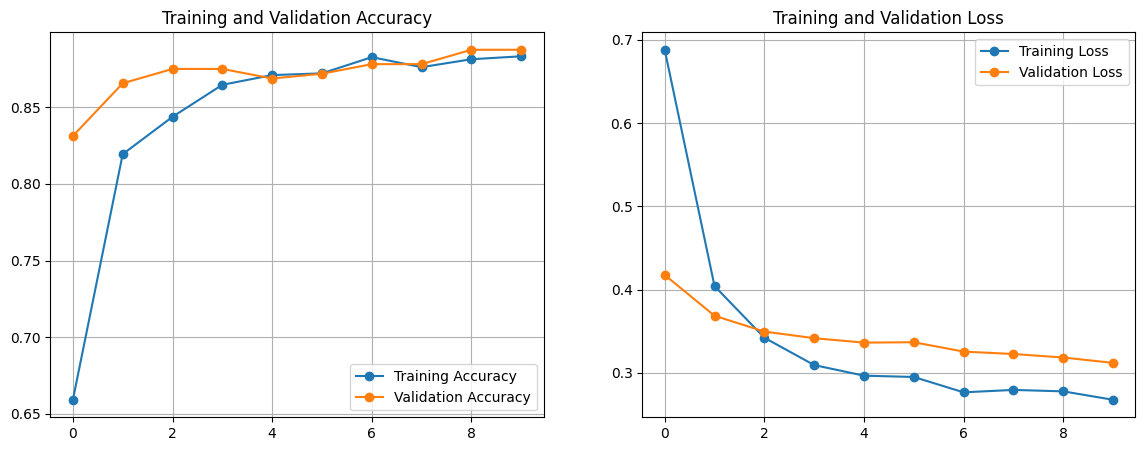

In [16]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.grid(True)

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss', marker='o')
    plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.grid(True)

    plt.show()

# Call the function
plot_history(history)

### Evaluation

In [17]:
test_loss, test_accuracy = model.evaluate(test_dataset)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.8028 - loss: 0.4076
Test Accuracy: 0.8281
Test Loss: 0.3863


In [18]:
import numpy as np

y_true = []
y_pred = []

for images, labels in test_dataset:
    preds = model.predict(images)
    preds = tf.argmax(preds, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(preds.numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


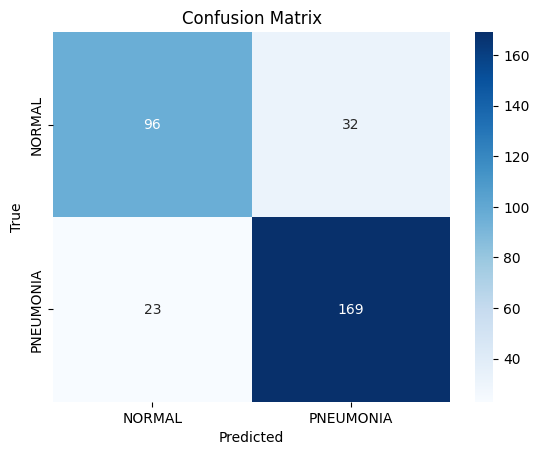

              precision    recall  f1-score   support

      NORMAL       0.81      0.75      0.78       128
   PNEUMONIA       0.84      0.88      0.86       192

    accuracy                           0.83       320
   macro avg       0.82      0.82      0.82       320
weighted avg       0.83      0.83      0.83       320



In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NORMAL', 'PNEUMONIA'], yticklabels=['NORMAL', 'PNEUMONIA'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=['NORMAL', 'PNEUMONIA']))

### Saliency Map

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def compute_saliency_map(model, image_tensor, class_index=None):
    """
    Compute the saliency map of an image for a given model.

    Args:
        model: The trained TensorFlow model.
        image_tensor: Tensor of shape (H, W, C) or (1, H, W, C). Pixel values should match model input.
        class_index: Optional target class index. If None, uses predicted class.

    Returns:
        A numpy array of the normalized saliency map.
    """

    # Ensure batch dimension
    if len(image_tensor.shape) == 3:
        image_tensor = tf.expand_dims(image_tensor, axis=0)

    # Track gradients
    image_tensor = tf.cast(image_tensor, tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(image_tensor)
        predictions = model(image_tensor)
        if class_index is None:
            class_index = tf.argmax(predictions[0])
        target_output = predictions[:, class_index]

    # Compute gradients of the target class wrt the input image
    gradients = tape.gradient(target_output, image_tensor)[0]

    # Take the absolute maximum value across channels
    saliency = tf.reduce_max(tf.abs(gradients), axis=-1)

    # Normalize the saliency map between 0 and 1
    saliency = (saliency - tf.reduce_min(saliency)) / (tf.reduce_max(saliency) - tf.reduce_min(saliency) + tf.keras.backend.epsilon())

    return saliency.numpy()


In [21]:
def show_saliency_on_image(image, saliency_map, cmap='jet'):
    """
    Display the original image with the saliency map overlay.

    Args:
        image: Original image (H, W, C) numpy array.
        saliency_map: Saliency map (H, W) numpy array.
    """
    plt.figure(figsize=(10, 4))

    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(image.astype("uint8"))
    plt.axis('off')
    plt.title("Original Image")

    # Saliency Map Only
    plt.subplot(1, 3, 2)
    plt.imshow(saliency_map, cmap=cmap)
    plt.axis('off')
    plt.title("Saliency Map")

    # Overlay Saliency Map on Image
    plt.subplot(1, 3, 3)
    plt.imshow(image.astype("uint8"))
    plt.imshow(saliency_map, cmap=cmap, alpha=0.5)
    plt.axis('off')
    plt.title("Overlay")

    plt.tight_layout()
    plt.show()


Saliency Map for NORMAL Image


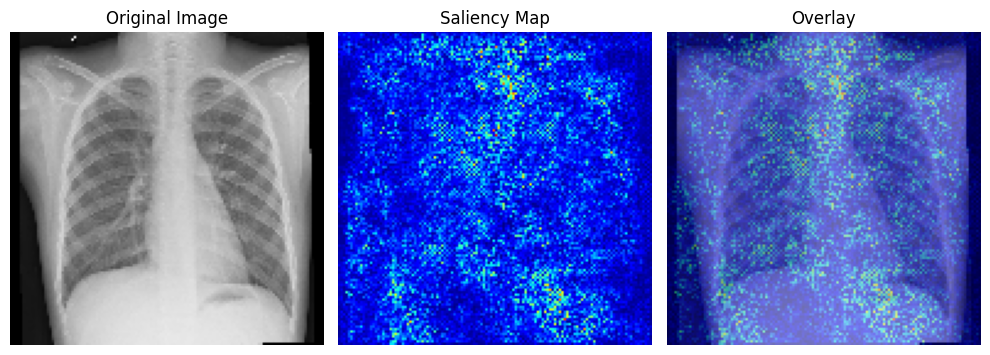

Saliency Map for PNEUMONIA Image


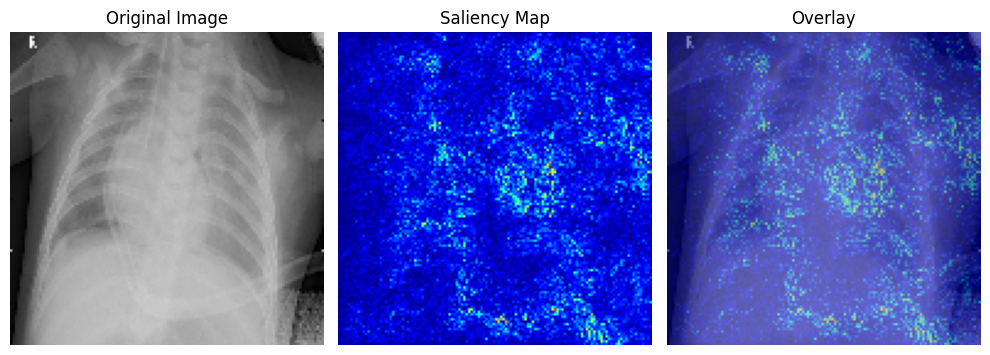

In [22]:
import numpy as np

# Initialize variables
normal_image = None
pneumonia_image = None

# Find one NORMAL and one PNEUMONIA image from test_dataset
for images, labels in test_dataset:
    for img, label in zip(images, labels):
        if label == 0 and normal_image is None:
            normal_image = img
        elif label == 1 and pneumonia_image is None:
            pneumonia_image = img
        if normal_image is not None and pneumonia_image is not None:
            break
    if normal_image is not None and pneumonia_image is not None:
        break

# Convert images to displayable format
normal_display = (normal_image.numpy()).astype(np.uint8)
pneumonia_display = (pneumonia_image.numpy()).astype(np.uint8)

# Compute saliency maps
normal_saliency = compute_saliency_map(model, normal_image)
pneumonia_saliency = compute_saliency_map(model, pneumonia_image)

# Display both
print("Saliency Map for NORMAL Image")
show_saliency_on_image(normal_display, normal_saliency)

print("Saliency Map for PNEUMONIA Image")
show_saliency_on_image(pneumonia_display, pneumonia_saliency)

## Finetuning

In [23]:
# Unfreeze the top layers of the base model
base_model.trainable = True

# Fine-tune only the last N layers (e.g., last 30 layers)
for layer in base_model.layers[:-30]:
    layer.trainable = False


In [24]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-5),  # much lower LR for fine-tuning
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [25]:
history_finetuned = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5,
    class_weight=class_weights_dict,
    callbacks=[early_stopping]
)

Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 305ms/step - accuracy: 0.8004 - loss: 0.4786 - val_accuracy: 0.8750 - val_loss: 0.3216
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 73s 298ms/step - accuracy: 0.8780 - loss: 0.3014 - val_accuracy: 0.8844 - val_loss: 0.3068
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 301ms/step - accuracy: 0.8997 - loss: 0.2378 - val_accuracy: 0.8906 - val_loss: 0.2930
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 51s 310ms/step - accuracy: 0.9046 - loss: 0.2552 - val_accuracy: 0.8844 - val_loss: 0.2880
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 49s 302ms/step - accuracy: 0.9109 - loss: 0.2309 - val_accuracy: 0.8844 - val_loss: 0.2822


In [26]:
test_loss, test_accuracy = model.evaluate(test_dataset)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.8754 - loss: 0.3643
Test Accuracy: 0.8625
Test Loss: 0.3570


In [27]:
import numpy as np

y_true = []
y_pred = []

for images, labels in test_dataset:
    preds = model.predict(images)
    preds = tf.argmax(preds, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(preds.numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


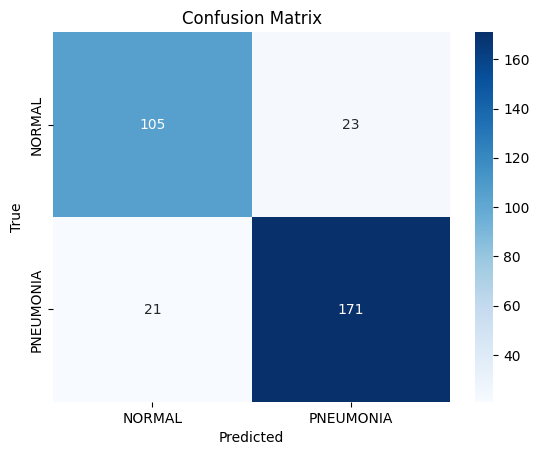

              precision    recall  f1-score   support

      NORMAL       0.83      0.82      0.83       128
   PNEUMONIA       0.88      0.89      0.89       192

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320



In [28]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NORMAL', 'PNEUMONIA'], yticklabels=['NORMAL', 'PNEUMONIA'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=['NORMAL', 'PNEUMONIA']))

Saliency Map for NORMAL Image


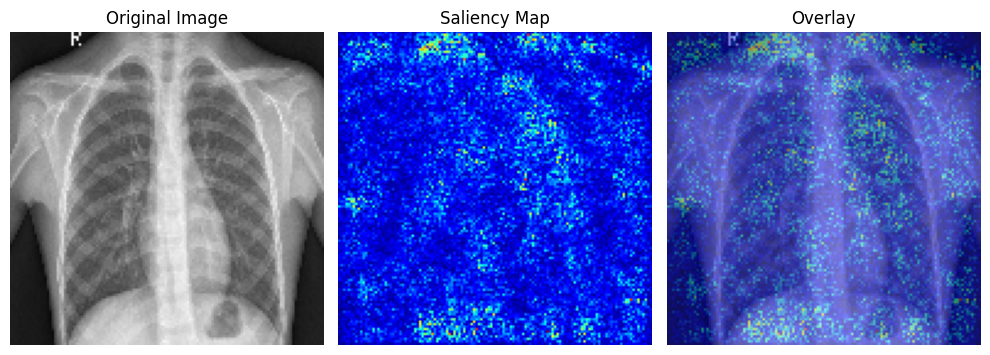

Saliency Map for PNEUMONIA Image


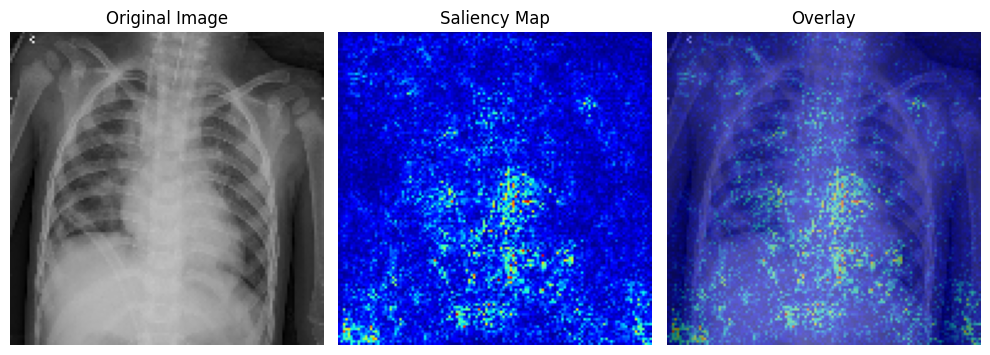

In [29]:
import numpy as np

# Initialize variables
normal_image = None
pneumonia_image = None

# Find one NORMAL and one PNEUMONIA image from test_dataset
for images, labels in test_dataset:
    for img, label in zip(images, labels):
        if label == 0 and normal_image is None:
            normal_image = img
        elif label == 1 and pneumonia_image is None:
            pneumonia_image = img
        if normal_image is not None and pneumonia_image is not None:
            break
    if normal_image is not None and pneumonia_image is not None:
        break

# Convert images to displayable format
normal_display = (normal_image.numpy()).astype(np.uint8)
pneumonia_display = (pneumonia_image.numpy()).astype(np.uint8)

# Compute saliency maps
normal_saliency = compute_saliency_map(model, normal_image)
pneumonia_saliency = compute_saliency_map(model, pneumonia_image)

# Display both
print("Saliency Map for NORMAL Image")
show_saliency_on_image(normal_display, normal_saliency)

print("Saliency Map for PNEUMONIA Image")
show_saliency_on_image(pneumonia_display, pneumonia_saliency)

In [30]:
model.save("pneumonia_model.keras")